In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, kv
from scipy.integrate import dblquad


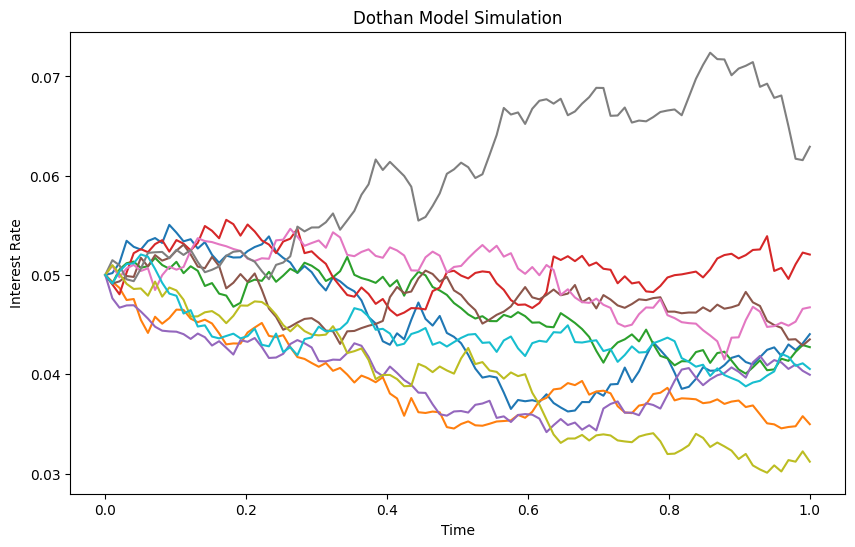

In [2]:
def simulate_dothan(r0, a, sigma, T, dt, n_paths):
    n_steps = int(T/dt)
    r = np.zeros((n_steps, n_paths))
    r[0] = r0
    
    dW = np.sqrt(dt) * np.random.normal(size=(n_steps, n_paths))
    
    for t in range(1, n_steps):
        r[t] = r[t-1] * np.exp((a - 0.5 * sigma**2) * dt + sigma * dW[t])
        
    return r

# Parameters
r0 = 0.05  # initial interest rate
a = -0.1  # mean reversion level
sigma = 0.2  # volatility
T = 1  # time horizon
dt = 0.01  # time step
n_paths = 10  # number of paths

# Simulate interest rate paths
r = simulate_dothan(r0, a, sigma, T, dt, n_paths)

# Plot the simulated paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(np.linspace(0, T, int(T/dt)), r[:, i])
plt.title('Dothan Model Simulation')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.show()


In [5]:
def zero_coupon_bond_price(r_t, a, sigma, T, t):
    p = 0.5 - a
    bar_r = 2 * r_t / sigma**2
    
    def f(z):
        return np.exp(-sigma**2 * (4 * p**2 + z**2) * (T-t) / 8) * z * np.abs(gamma(-p + 1j * z / 2))**2 * np.cosh(np.pi * z / 2)
    
    def integrand(y, z):
        return (bar_r**p / np.pi**2) * np.sin(2 * np.sqrt(bar_r) * np.sinh(y)) * f(z) * np.sin(y * z)
    
    first_term, _ = dblquad(integrand, 0, np.inf, lambda z: 0, lambda z: np.inf)
    second_term = (2 / gamma(2 * p)) * (bar_r ** p) * kv(2 * p, 2 * np.sqrt(bar_r))
    
    return first_term + second_term


In [6]:
# Calculate zero-coupon bond price
P = zero_coupon_bond_price(r0, a, sigma, T=1, t=0)
print(f"Zero-coupon bond price: {P}")

<ipython-input-5-8bacf43c4bff>:9: RuntimeWarning: overflow encountered in sinh
  return (bar_r**p / np.pi**2) * np.sin(2 * np.sqrt(bar_r) * np.sinh(y)) * f(z) * np.sin(y * z)
<ipython-input-5-8bacf43c4bff>:9: RuntimeWarning: invalid value encountered in sin
  return (bar_r**p / np.pi**2) * np.sin(2 * np.sqrt(bar_r) * np.sinh(y)) * f(z) * np.sin(y * z)
<ipython-input-5-8bacf43c4bff>:6: RuntimeWarning: overflow encountered in cosh
  return np.exp(-sigma**2 * (4 * p**2 + z**2) * (T-t) / 8) * z * np.abs(gamma(-p + 1j * z / 2))**2 * np.cosh(np.pi * z / 2)
<ipython-input-5-8bacf43c4bff>:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-sigma**2 * (4 * p**2 + z**2) * (T-t) / 8) * z * np.abs(gamma(-p + 1j * z / 2))**2 * np.cosh(np.pi * z / 2)


Zero-coupon bond price: nan
